In [ ]:
!pip install qiskit
!pip install pylatexenc

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.circuit.library import AND
# import basic plot tools
from qiskit.visualization import plot_histogram

In [ ]:
def phase_oracle(circuit):
    circuit.cz(0, 2)
    circuit.cz(1, 2)

def diffuser(circuit):
    """Apply inversion about the average step of Grover's algorithm."""
    qubits = circuit.qubits
    nqubits = len(qubits)
    
    for q in range(nqubits):
        circuit.h(q)
        circuit.x(q)
    
    # Do controlled-Z
    circuit.h(2)
    circuit.ccx(0,1,2)
    circuit.h(2)
    
    for q in range(nqubits):
        circuit.x(q)
        circuit.h(q)

In [ ]:
n = 3
barriers = True

grover_circuit = QuantumCircuit(n)

for qubit in range(n):
    grover_circuit.h(qubit)

if barriers:
    grover_circuit.barrier()

phase_oracle(grover_circuit)

if barriers:
    grover_circuit.barrier()

diffuser(grover_circuit)

grover_circuit.measure_all()

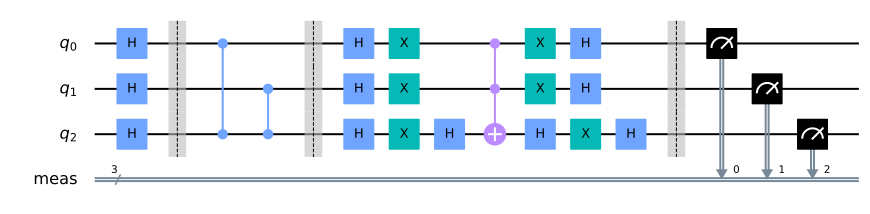

In [ ]:
grover_circuit.draw(output="mpl")

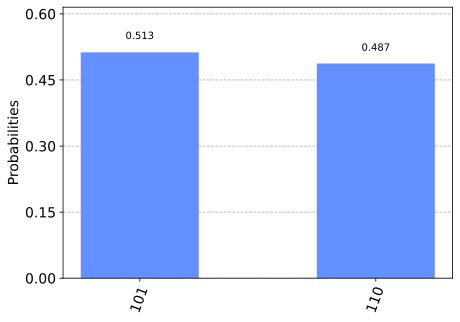

In [ ]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [ ]:
def phase_oracle(circuit):
    circuit.x([0, 2, 3])
    circuit.h(3)
    circuit.mcx([0,1,2], 3)
    circuit.h(3)
    circuit.x([0, 2, 3])

def diffuser(circuit):
    """Apply inversion about the average step of Grover's algorithm."""
    qubits = circuit.qubits
    nqubits = len(qubits)
    
    for q in range(nqubits):
        circuit.h(q)
        circuit.z(q)
    
    # Do controlled-Z
    circuit.h(3)
    circuit.mcx([0,1,2],3)
    circuit.h(3)
    
    for q in range(nqubits):
        circuit.h(q)

In [ ]:
n = 4
barriers = True

grover_circuit = QuantumCircuit(n)

for qubit in range(n):
    grover_circuit.h(qubit)

for _ in range(3):    
    if barriers:
        grover_circuit.barrier()

    phase_oracle(grover_circuit)

    if barriers:
        grover_circuit.barrier()

    diffuser(grover_circuit)

grover_circuit.measure_all()

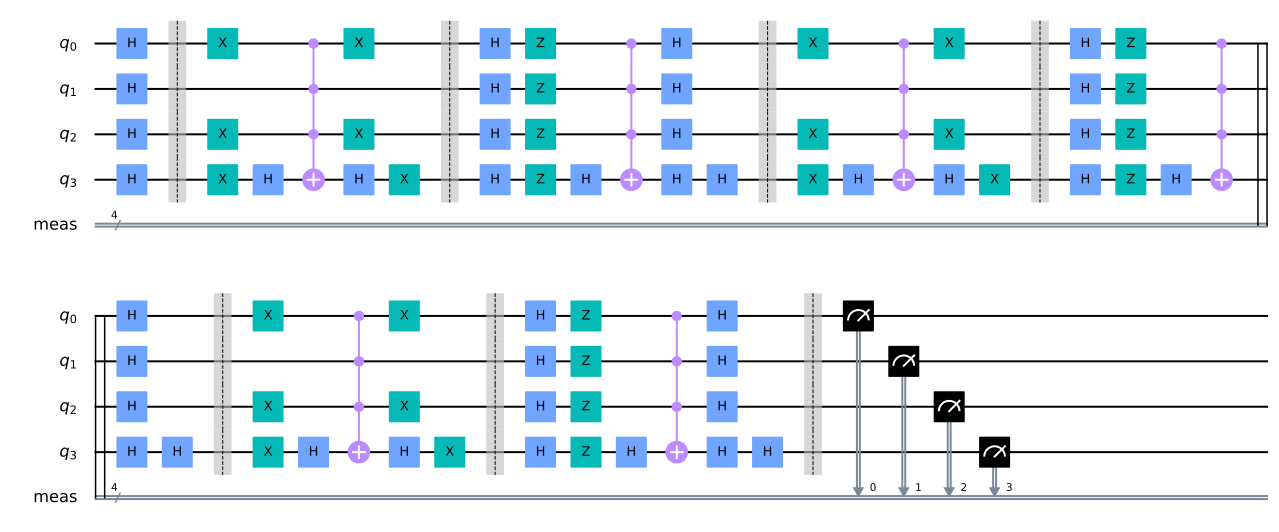

In [ ]:
grover_circuit.draw(output="mpl")

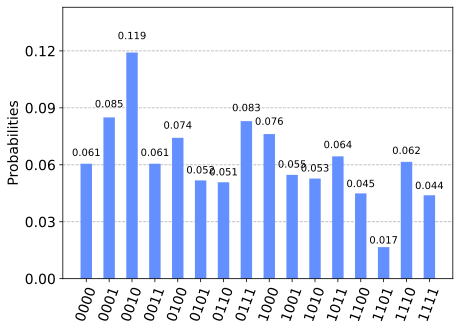

In [ ]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)